In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

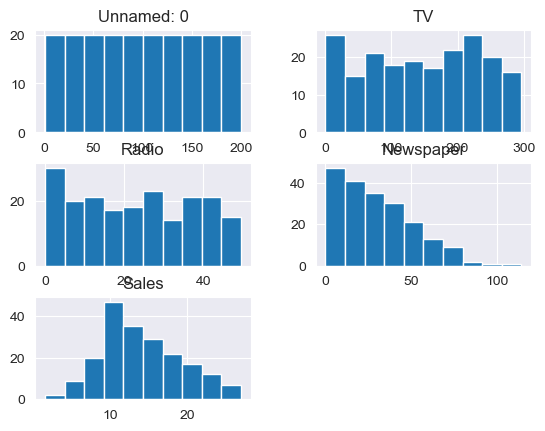

In [4]:
data.hist()

In [5]:
from matplotlib import pyplot as plt

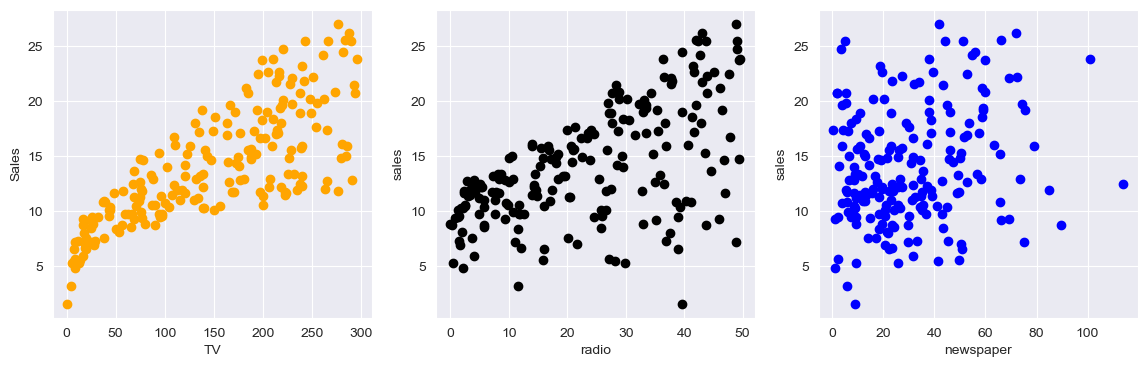

In [6]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(data['TV'], data['Sales'], color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(data['Radio'], data['Sales'], color = 'black')
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(data['Newspaper'], data['Sales'], color = 'blue')
plt.xlabel('newspaper')
plt.ylabel('sales')


plt.show()

In [7]:
data.cov()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,3350.000000,88.027387,-95.110050,-195.311558,-15.587186
TV,88.027387,7370.949893,69.862492,105.919452,350.390195
Radio,-95.110050,69.862492,220.427743,114.496979,44.635688
Newspaper,-195.311558,105.919452,114.496979,474.308326,25.941392
Sales,-15.587186,350.390195,44.635688,25.941392,27.221853


In [8]:
def covarianza(x,y):
    cov = 0
    for i in range(len(y)):
        cov += (x[i]-np.mean(x))*(y[i]-np.mean(y))
    cov = cov/len(y)
    return cov

print("Covarianza tv: ", covarianza(data['TV'],data['Sales']))
print("Covarianza Radio",covarianza(data['Radio'],data['Sales']))
print("Covarianza Newspaper: ",covarianza(data['Newspaper'],data['Sales']))

Covarianza tv:  348.6382437499999
Covarianza Radio 44.412509999999976
Covarianza Newspaper:  25.811684999999997


In [9]:
def correlacion_Pearson(X, Y):
  return covarianza(X, Y) / math.sqrt(covarianza(X, X) * covarianza(Y, Y))

colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(correlacion_Pearson(data[col], data['Sales']))

0.7822244248616061
0.576222574571055
0.22829902637616528


In [10]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']
print(data[colnames].corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


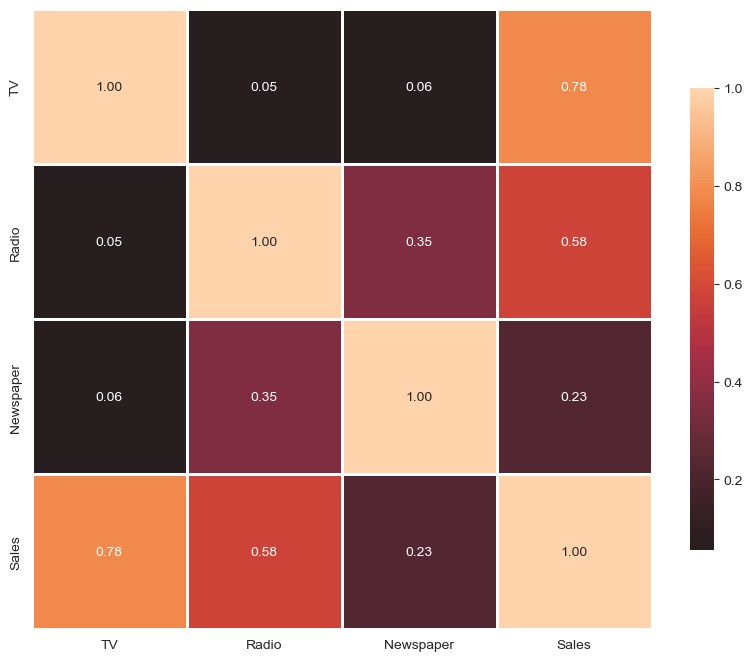

In [11]:
import seaborn as sns

def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']

mapa_de_calor_correlacion(data)

In [12]:
theta_0, theta_1 = 80, 0.05
mse_value = 0
x = data['TV']
y = data['Sales']
m = len(x)

In [13]:
def MSE(h, Y):
  return np.sum((h - Y) ** 2) / (2 * (len(h)))

def aplica_hipotesis(X, theta_0, theta_1):
  return theta_1 * X + theta_0

def cal_costo(X, Y, theta_0, theta_1):
  h = aplica_hipotesis(X, theta_0, theta_1)
  cost = MSE(h, Y)
  return h, cost

MSE  =  5.257745326399999


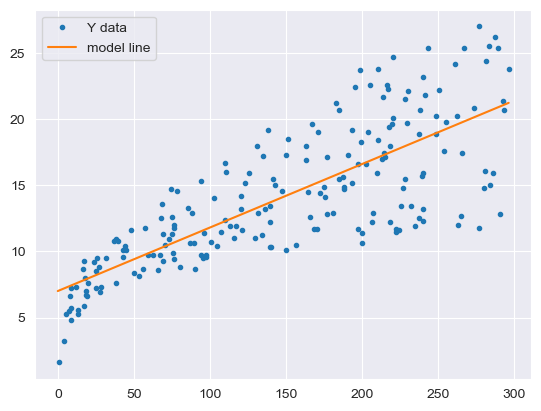

In [14]:
def plot(X, Y, theta_0, theta_1):
  x = np.linspace(0, X.max(), len(X))
  plt.plot(X, Y, marker='.', linestyle='none', label='Y data')
  plt.plot(x, aplica_hipotesis(x, theta_0, theta_1), label='model line')
  plt.legend(loc="upper left")
  plt.show()
theta_0, theta_1 = 7, 0.048
X, Y = data['TV'].to_numpy(),data["Sales"].to_numpy()
h, cost = cal_costo(X, Y, theta_0, theta_1)
print('MSE  = ', cost)
plot(X, Y, theta_0, theta_1)

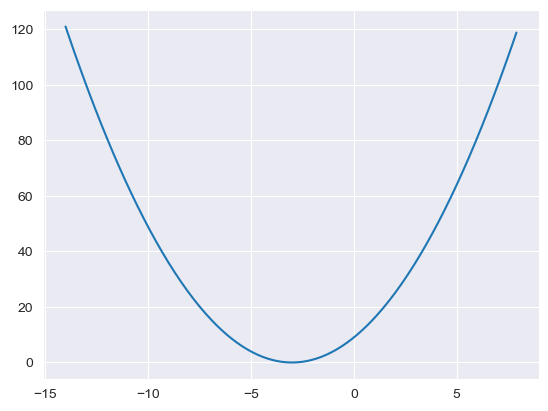

In [20]:
x = np.arange(-14, 8, 0.1)
y = (x + 3) ** 2

plt.plot(x,y)
plt.show()

In [21]:
def grad_des(w, lr, epocas):
    resultados = []
    for i in range(epocas):
        w =  w - lr * (2*w + 6)
        resultados.append(w)
    return resultados


In [22]:
resultados = grad_des(7, 0.1, 200)

In [23]:
resultados

[5.0,
 3.4,
 2.1199999999999997,
 1.0959999999999999,
 0.2767999999999998,
 -0.3785600000000001,
 -0.9028480000000001,
 -1.3222784,
 -1.65782272,
 -1.926258176,
 -2.1410065408,
 -2.3128052326399997,
 -2.4502441861119997,
 -2.5601953488895997,
 -2.6481562791116797,
 -2.718525023289344,
 -2.774820018631475,
 -2.81985601490518,
 -2.855884811924144,
 -2.884707849539315,
 -2.907766279631452,
 -2.9262130237051616,
 -2.9409704189641293,
 -2.9527763351713032,
 -2.9622210681370427,
 -2.969776854509634,
 -2.9758214836077075,
 -2.980657186886166,
 -2.984525749508933,
 -2.9876205996071463,
 -2.9900964796857172,
 -2.992077183748574,
 -2.993661746998859,
 -2.9949293975990874,
 -2.9959435180792697,
 -2.996754814463416,
 -2.997403851570733,
 -2.9979230812565865,
 -2.9983384650052693,
 -2.9986707720042154,
 -2.9989366176033725,
 -2.999149294082698,
 -2.999319435266158,
 -2.9994555482129264,
 -2.9995644385703413,
 -2.999651550856273,
 -2.9997212406850187,
 -2.999776992548015,
 -2.999821594038412,
 -2.99

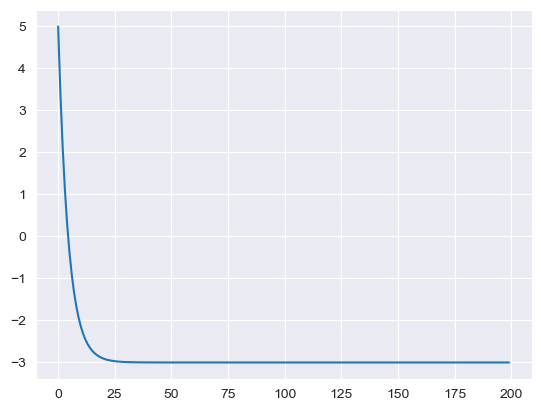

In [24]:
plt.plot(resultados)
plt.show()